<a href="https://colab.research.google.com/github/JoYongJIn/YongJin-Repository/blob/main/linear_models_for_regression_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/auto-mpg .csv",sep = ",")
df.head()

In [ ]:
df.info() #데이터의 정보가 적을때 데이터를 합리적으로 생성하여 학습데이터로 이용하는 방법(knn등)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#결측치가 없는것도 확인했는데 오류가 떠서 데이터의 타입을 확인해본다.
print(df.dtypes)
#확인을 해보니 horsepower가 csv파일을 보면 정수인데 object(문자열을 나타낸다)라고 나온다.
#문자형태를 숫자형태로 바꾸는 두가지 방법으로는 onehotencoding과 pandas.to_numeric()함수가있다.
#horsepower에서 나머지가 전부 실수자료형이고 몇개만 ?인(문자자료형)이어도 type이 object라고 나온다.

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [ ]:
#결측치가 없다.
df.isnull().sum() # sum() 붙으면 데이터프레임에서 결측치의 총합을알려준다.

In [ ]:
#결측치문제를 해결하기위한 과정인데 raise를 통해 문제의 원인을 찾을수있다.
#이를 통해 위치를 특정하여 직접 확인해봤는데 결측치가 있다.
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='raise')

<Axes: >

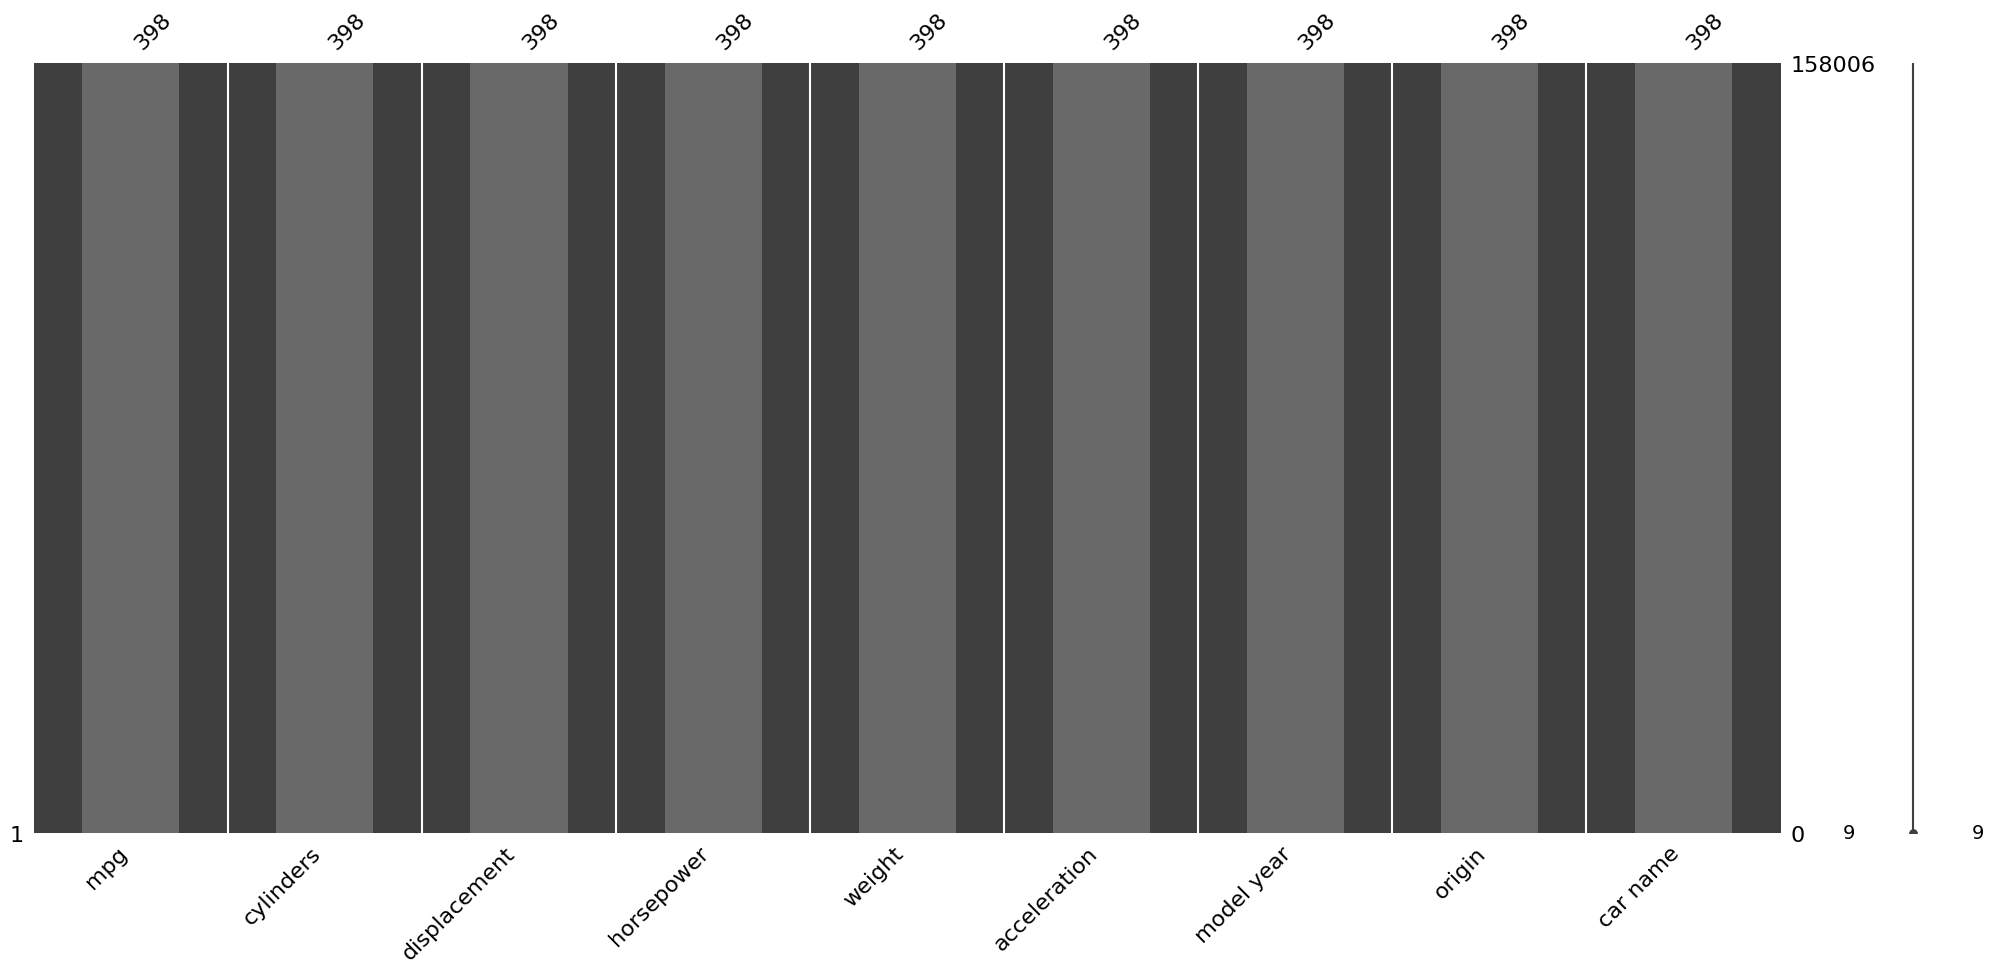

In [ ]:
#dataset을 훑어보니 범주형자료(이미 onehotencoding되어있다.)는 없고 결측치는 있다.(결측치 없는것으로 보이는데?)
import missingno as msno
#실수 조심해야한다 자세히 보니 horsepower에 결측치가 있다.(아래에서 결측치가 확인되지 않는이유는 ?라는 값이 들어가있기 떄문이다.)
# 결측치 위치 시각화
msno.matrix(df)

# 결측치 비율 시각화
msno.bar(df)

In [ ]:
#이상치(아웃라이어)탐지를 위해 박스플롯을 그려본다(EDA)
#아래를 이용해 key값에 오류가 없는걸 확인했는데 계속 안그려져서 생각해보니 horsepower에 ?로 결측치있어서 못그려주는것이다.
#그래서 결측치부분을 무시하고 그려주도록 코드를 짰다
#그래도 안돼서 아래처럼해봄
df['horsepower'] = pd.to_numeric(df['horsepower'], errors= 'coerce')

sns.boxplot(x=df['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])

plt.show()

In [ ]:
#위코드에서 KeyError발생하여 디버깅 해보려한다 (하나씩하나씩해보자 진짜 key값이 안들어가면 오류문구가 나온다.)
try:
    print(df['origin'])
except KeyError as e:
    print("KeyError occurred:", e)
    print("Available column names:", df.columns)

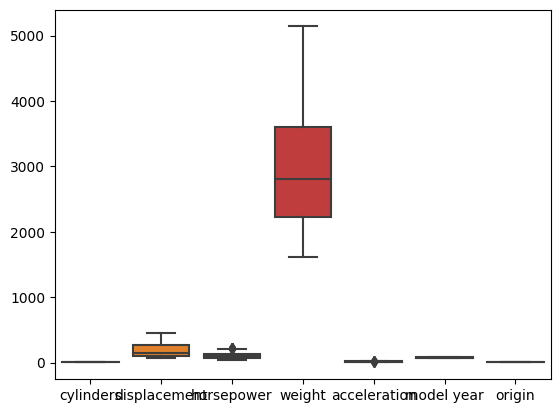

In [ ]:
#하나씩 해보면 왜안되는지 보고있다.
#개별적으로 각각하니까 되는데
#왜 여러개를 한번에 하면 안돼지? 문제는 아래 data 자리에 x라고 써서 그런것인데 x
df['horsepower'] = pd.to_numeric(df['horsepower'], errors= 'coerce')

sns.boxplot(data=df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']])
plt.show()

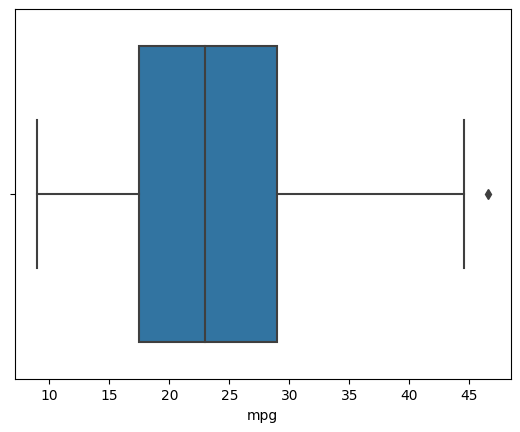

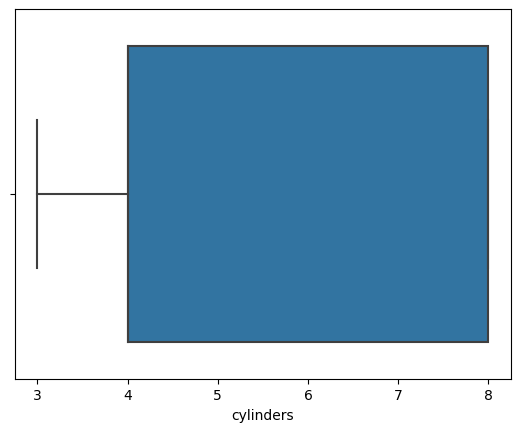

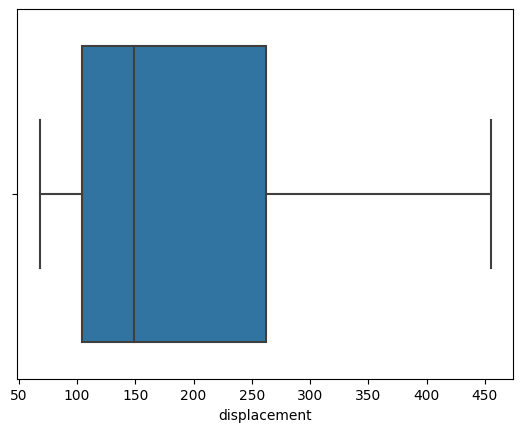

TypeError: ignored

In [ ]:
#위처럼 하면 하나의 좌표평면에 그려져서 작게보이므로 개별적으로 그려지도록해본다.

for column in df.columns:
  sns.boxplot(x=df[column])
  plt.show()

#그냥 무시해도 되는 빨간줄
#확인을 해보니 이상치가 많다 그래서 스케일링을 표준화를 이용해 하려한다.

In [ ]:
#타깃값이 연속형인 회귀문제이므로 타깃값도 같이 스케일링해주도록한다.
#결측치를 knn 멘하탄거리를 이용해 보간해주기 위해 스케일링작업을 하는것인데 결측치떄문에 실행이 안되는것으로
#그냥 그 결측치부분을 무시하고 스케일링 하면 아무문제가 안된다.
from sklearn.preprocessing import StandardScaler

# 문자열과 결측치 제외한 데이터프레임 생성
df_numeric = df.select_dtypes(include=[np.number]).dropna()

#표준화 객체 생성
scaler = StandardScaler() #특정 column만 지정하지않고 전부 스케일링하는 코드이다.

# 표준화 수행(마지막 괄호부분에 결측치가 제외된 데이터프레임을 입력해야한다.)
scaled_data = scaler.fit_transform(df_numeric)

# 스케일링된 데이터를 데이터프레임으로 변환(여기도 마지막에 numeric으로 해야함)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)

# 결과 출력
print(scaled_df)

In [ ]:
#scaled_df가 어떤상태인지 csv로 보기위해 저장해본다.

import csv

f = open("mpg.csv", "w")
g = csv.writer(f)
g.writerows(scaled_df)
f.close()

In [ ]:
#일단 위에꺼 못해서 이렇게한다.
print(scaled_df.iloc[33])

mpg            -0.955212
cylinders       0.309967
displacement    0.292679
horsepower      0.013803
weight          0.543918
acceleration   -0.014999
model year     -1.353505
origin         -0.716641
Name: 33, dtype: float64


In [ ]:
# 결측치를 보간하기 위한 KNNImputer 객체 생성 (맨하탄 거리 사용)
imputer = KNNImputer(n_neighbors=5, metric='manhattan')

#결측치값을 처리하는 방법
scaled_df['horsepower'] = pd.to_numeric(scaled_df['horsepower'], errors= 'coerce')

# 결측치 보간
imputed_data = imputer.fit_transform(scaled_df)

# 보간된 데이터프레임 생성
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

# 결과 출력
print(imputed_df)

In [ ]:
#표준화를 완료했으므로 이제 결측치를 knn 멘하탄거리를 이용해 보간해보자

from sklearn.impute import KNNImputer

# 데이터프레임 '?'값을 non값으로 대체하여야한다 결측치라고 인식되어야 결측치 처리가 되기떄문이다.
df.replace('?', np.nan, inplace=True)

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5, metric='manhattan')

#결측치값을 처리하는 방법
scaled_df['horsepower'] = pd.to_numeric(scaled_df['horsepower'], errors= 'coerce')

# 결측치 보간
imputed_data = imputer.fit_transform(scaled_df)

# 보간된 데이터를 원래 스케일로 변환
imputed_data = scaler.inverse_transform(imputed_data)


# 보간된 데이터프레임 생성
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)


# 결과 출력
print(imputed_df)

In [ ]:
#참고
from sklearn.impute import KNNImputer #scikit-learn라이브러리는 머신러닝을 구현하는 데 사용되는 라이브러리로 다양한 분류,회귀,군집,차원축소등 기계학습 알고리즘을 제공한다.

# KNNImputer 객체 생성(모델링 작업을 수행하기 위해서는 객체를 생성해놓아야 실행가능하다.)
imputer = KNNImputer(n_neighbors=30)#imputer는 누락된 데이터를 대체한다는 말이다.

# margin_low 열의 결측치를 채움
margin_low = df['margin_low'].values.reshape(-1, 1) #예를 들어 reshape(10,2)이면 20개의 원소를 가진 1차원 배열을 10행 2열의 2차원 배열로 변환한다. -1은 해당 차원의 크기를 자동으로 결정한다.
imputed_margin_low = imputer.fit_transform(margin_low) #따라서 reshape(-1,1)은 원래 1차원 배열의 길이에 따라 열 크기가 1인 2차원 배열을 생성한다.

# 채워진 값을 margin_low 열에 적용
df['margin_low'] = imputed_margin_low

In [ ]:
#(공부해야함)
from sklearn.neighbors import NearestNeighbors

# 결측치를 제외한 데이터만 선택
X = scaled_df.dropna()

# NearestNeighbors 객체 생성 (맨하탄 거리 사용)
knn = NearestNeighbors(n_neighbors=5, metric='manhattan')
knn.fit(X)

# 결측치를 보간할 데이터 선택
missing_data = scaled_df[scaled_df.isnull().any(axis=1)]

# 결측치를 보간
for i, row in missing_data.iterrows():
    query = row.dropna().values.reshape(1, -1)
    _, indices = knn.kneighbors(query)
    nearest_values = X.iloc[indices[0]].values
    imputed_values = np.nanmean(nearest_values, axis=0)
    scaled_df.loc[i, scaled_df.columns] = imputed_values

# 결과 출력
print(scaled_df)

In [ ]:
# 피처와 타겟 분리: 머신러닝 모델에게 학습을 위한 피처들과 예측하려는 타겟(라벨)을 분리해야 합니다.

X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]  # features
y = df['mpg']  # target variable

In [ ]:
#데이터 분할: 데이터를 훈련 세트와 테스트 세트로 분할합니다. 이는 모델의 일반화 성능을 평가하기 위함입니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random_state 선택사항이다.

In [ ]:
# 모델 생성과 훈련: 선형 회귀 모델을 생성하고, 훈련 데이터를 사용하여 모델을 학습시킵니다.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions)) #
print('RMSE:', rmse)
